# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)


DBSCAN is a popular clustering algorithm that is part of the unsupervised learning techniques in data mining and machine learning. Unlike centroid-based algorithms like K-means, DBSCAN categorizes data points into clusters based on their density.

DBSCAN requires two parameters:
  - `eps` (epsilon): The maximum distance between two points for one to be considered as in the neighborhood of another.
  - `min_samples`: The minimum number of points required to form a dense region (a cluster).



How DBSCAN works:
1. **Classification of Points**: Points are classified into three types:
   - Core Points: A point is a core point if at least `min_samples` points are within `eps` distance from it.
   - Border Points: A point is a border point if it is not a core point itself, but is in the neighborhood of a core point.
   - Noise Points: Points that are neither core nor border points.

2. **Growing Clusters**: Starting from a core point, a cluster is expanded by recursively adding all directly density-reachable points to the cluster. This process continues until no new points can be added.


In this notebook, we will apply DBSCAN method on dataset and analyse the results. I'm using Moon dataset for this. 

In [2]:
#Import libraries and dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [3]:
# Generate the dataset with 300 samples and some noise
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)


In [4]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Application of DBSCAN algorithm on the Moon dataset. 

In [5]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)


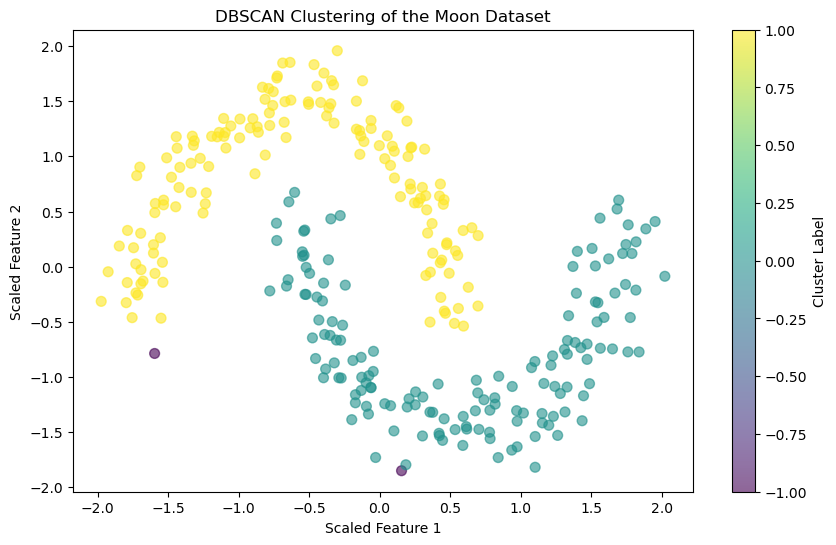

In [6]:
# Visualize the clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title("DBSCAN Clustering of the Moon Dataset")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()




From the plot, we can observe two prominent clusters corresponding to the two moon shapes. These clusters are clearly separated, indicating that the `eps` and `min_samples` parameters were appropriately chosen.

The results indicate that the chosen `eps` value of 0.3 and `min_samples` value of 5 were well-suited for this particular dataset. 


Now let us try diffrent values of the `eps`, to understand the impact of this parameters on our dataset clustering.



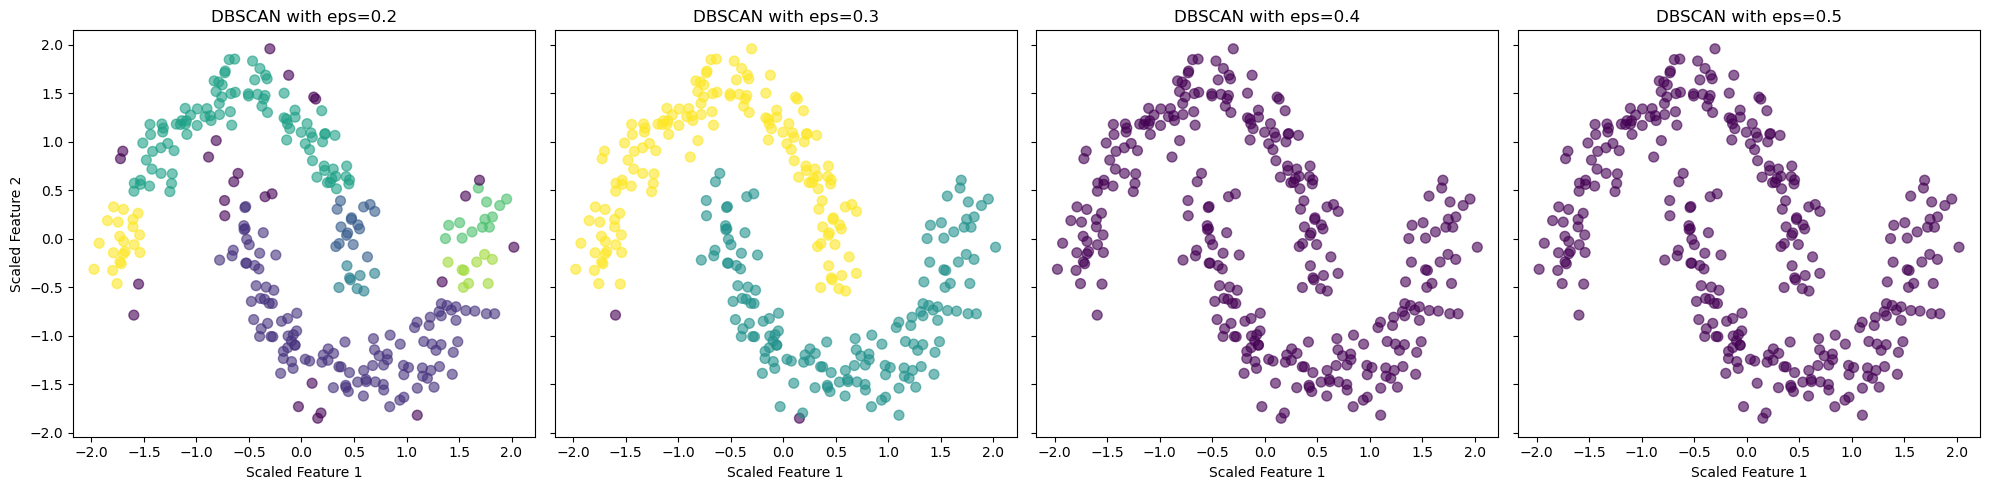

In [7]:
#Adjusting Parameters and Visualizing Changes

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
eps_values = [0.2, 0.3, 0.4, 0.5]  # Different epsilon values for comparison

for i, eps in enumerate(eps_values):
    # Apply DBSCAN with different eps values
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X_scaled)

    # Visualize the clusters
    axes[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6)
    axes[i].set_title(f'DBSCAN with eps={eps}')
    axes[i].set_xlabel('Scaled Feature 1')
    if i == 0:
        axes[i].set_ylabel('Scaled Feature 2')

plt.tight_layout()
plt.show()


eps Value Impact: The different eps values demonstrated that DBSCAN's performance is highly sensitive to this parameter. With too low an eps, the data was over-segmented, resulting in many small clusters. With too high an eps, the algorithm lost its ability to distinguish the two distinct moon shapes, merging them into one large cluster. An eps value of around 0.3 seemed to be optimal for the moon dataset, as it correctly identified the two crescent shapes as separate clusters.



Next we will check the silhouette coefficient of our DBSCAN analysis.

The silhouette coefficient is a measure of how similar an object is to its own cluster compared to other clusters. The value ranges from -1 to 1, where:

1: Implies that the object is very well matched to its own cluster and poorly matched to neighboring clusters.
0: Implies that the object is on or very close to the decision boundary between two neighboring clusters.
-1: Implies that the object is poorly matched to its own cluster and better matched to neighboring clusters.

In [8]:

#use of silhouette score 
from sklearn.metrics import silhouette_score

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Calculate silhouette score only for clusters that are not labeled as noise
mask = clusters != -1
if np.sum(mask) > 1:  # At least 2 points to form a cluster
    silhouette_avg = silhouette_score(X_scaled[mask], clusters[mask])
    print(f"Silhouette Coefficient: {silhouette_avg:.3f}")
else:
    print("Not enough points to form a cluster or evaluate the silhouette score.")


Silhouette Coefficient: 0.376


 coefficient of 0.376 suggests that, on average, data points are closer to the members of their own cluster than to the members of other clusters.  Given our dataset (moon) has two intertwined half-moons, a score of 0.376 can be considered quite satisfactory.

In [9]:
#sensitivity analysis by varying both eps and min_samples

eps_range = np.arange(0.1, 0.9, 0.1)
min_samples_range = range(1, 10)

results = []
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)
        results.append((eps, min_samples, n_clusters, n_noise))

# Print results
for res in results:
    print(f"EPS: {res[0]:.1f}, Min Samples: {res[1]}, Clusters: {res[2]}, Noise Points: {res[3]}")


EPS: 0.1, Min Samples: 1, Clusters: 139, Noise Points: 0
EPS: 0.1, Min Samples: 2, Clusters: 64, Noise Points: 75
EPS: 0.1, Min Samples: 3, Clusters: 32, Noise Points: 139
EPS: 0.1, Min Samples: 4, Clusters: 21, Noise Points: 188
EPS: 0.1, Min Samples: 5, Clusters: 11, Noise Points: 238
EPS: 0.1, Min Samples: 6, Clusters: 1, Noise Points: 294
EPS: 0.1, Min Samples: 7, Clusters: 0, Noise Points: 300
EPS: 0.1, Min Samples: 8, Clusters: 0, Noise Points: 300
EPS: 0.1, Min Samples: 9, Clusters: 0, Noise Points: 300
EPS: 0.2, Min Samples: 1, Clusters: 19, Noise Points: 0
EPS: 0.2, Min Samples: 2, Clusters: 11, Noise Points: 8
EPS: 0.2, Min Samples: 3, Clusters: 5, Noise Points: 20
EPS: 0.2, Min Samples: 4, Clusters: 6, Noise Points: 21
EPS: 0.2, Min Samples: 5, Clusters: 7, Noise Points: 25
EPS: 0.2, Min Samples: 6, Clusters: 8, Noise Points: 32
EPS: 0.2, Min Samples: 7, Clusters: 11, Noise Points: 52
EPS: 0.2, Min Samples: 8, Clusters: 12, Noise Points: 79
EPS: 0.2, Min Samples: 9, Clusters

We can see from our sensitivity analysis that as min_samples increased, more points were considered noise, especially at lower eps values. This reflects the algorithm's reliance on density for cluster formation. At higher eps values, almost all points were included in a single cluster, indicating an over-generalizing tendency with too large of a neighborhood size.

---

Conclusion: Ablove analysis suggests that while DBSCAN can effectively identify complex structures within the data, the choice of parameters is critical. The chosen eps and min_samples values greatly influenced the clustering outcome, underlining the importance of understanding the data's spatial structure when using density-based clustering.